In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
bgr_img = cv2.imread(r"D:\Learning\CV\Krishnaik_live\class_notes\Day-3\data\beach-blue.jpg")
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

In [3]:
def show_image(img, img_title="Image"):
    cv2.imshow(img_title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
show_image(bgr_img,"BGR_img")

In [5]:
kernel=np.array([[0, -1, 0],
                 [-1, 5, -1],
                 [0, -1, 0]])

In [6]:
def apply_filter(img, filter):
    b, g, r = cv2.split(img)
    new_b = cv2.filter2D(b, -1, kernel=filter)
    new_g = cv2.filter2D(g, -1, kernel=filter)
    new_r = cv2.filter2D(r, -1, kernel=filter)
    return cv2.merge([new_b, new_g, new_r])

In [7]:
filtered_img = apply_filter(bgr_img, kernel)

In [8]:
show_image(filtered_img)

In [9]:
blur_3 = cv2.GaussianBlur(bgr_img, (3,3), 0)
blur_9 = cv2.GaussianBlur(bgr_img, (9,9), 0)
blur_15 = cv2.GaussianBlur(bgr_img, (15,15), 0)
show_image(blur_3, "3 kernel gaussian blur")

In [10]:
show_image(blur_9, "9 kernel gaussian blur")
show_image(blur_15, "9 kernel gaussian blur")

In [11]:
show_image(filtered_img, "Sharpened image")

In [16]:
gray_img.shape

(900, 600)

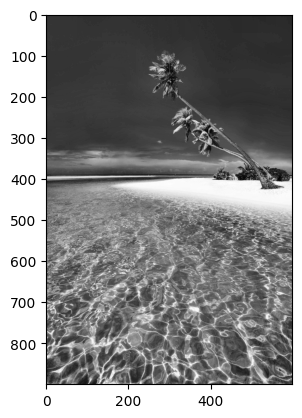

In [ ]:
clahe_obj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe_obj.apply(gray_img)
plt.imshow(clahe_img, cmap="gray")

Text(0.5, 1.0, 'Enhanced Contrast')

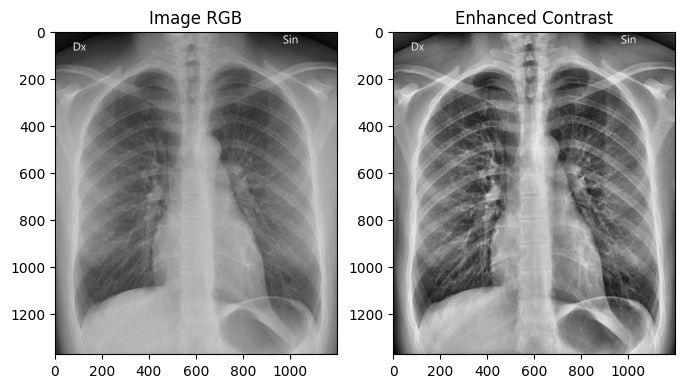

In [23]:
image = cv2.imread(r'class_notes\Day-3\data\xray.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cl1 = clahe.apply(gray)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray')
plt.title('Enhanced Contrast')

In [15]:
show_image(gray_img)

In [26]:
import os

def read_image(file_path, format="BGR"):
    format_dict = {"RGB": cv2.COLOR_BGR2RGB}

    if not (os.path.exists(file_path)):
        raise FileNotFoundError(file_path)
    
    bgr_img = cv2.imread(file_path)
    cvt_value = format_dict.get(format, None)
    if cvt_value is None:
        return bgr_img
    else:
        return cv2.cvtColor(bgr_img, cvt_value)

In [27]:
rgb = read_image(r"class_notes\Day-3\data\beach-blue.jpg", "RGB")

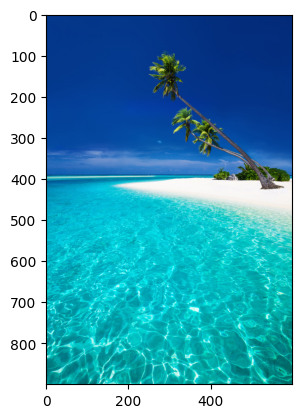

In [29]:
plt.imshow(rgb)

Text(0.5, 1.0, 'Enhanced Image')

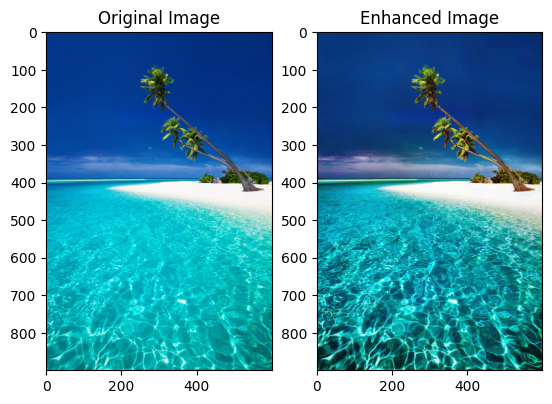

In [36]:
r, g, b = cv2.split(rgb)
clahe_obj = cv2.createCLAHE(clipLimit=2, tileGridSize=(4,4))
r_new = clahe_obj.apply(r)
g_new = clahe_obj.apply(g)
b_new = clahe_obj.apply(b)

new_rgb_img = cv2.merge([r_new, g_new, b_new])

plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(new_rgb_img)
plt.title("Enhanced Image")

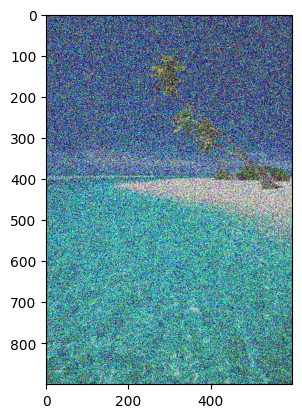

In [41]:
noise = np.random.normal(0,200, size=(rgb.shape))
noisy_img = rgb + noise
final_noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
plt.imshow(final_noisy_img)

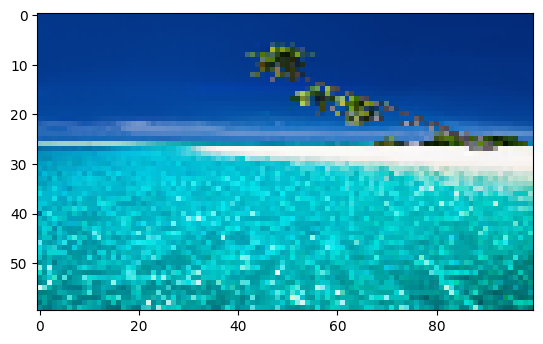

In [47]:
resized_image = cv2.resize(rgb, (100, 60), interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_image)

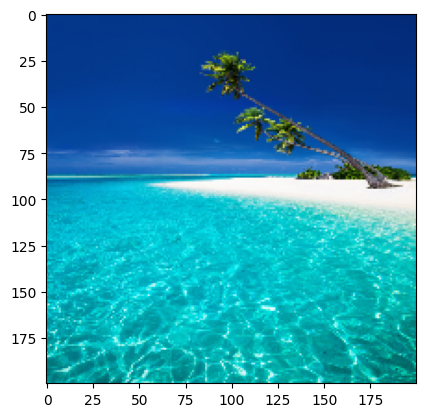

In [49]:
img_ar_1_1 = cv2.resize(rgb, (200, 200), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_ar_1_1)

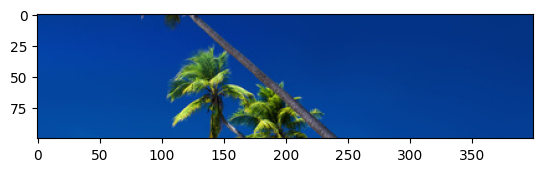

In [52]:
# Cropped image
crp_img = rgb[200:300, 200:800]
plt.imshow(crp_img)

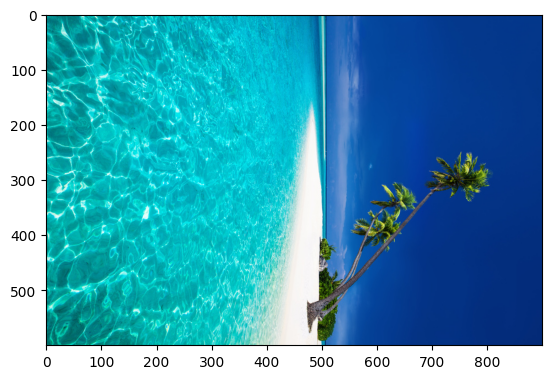

In [54]:
plt.imshow(cv2.rotate(rgb, cv2.ROTATE_90_CLOCKWISE))

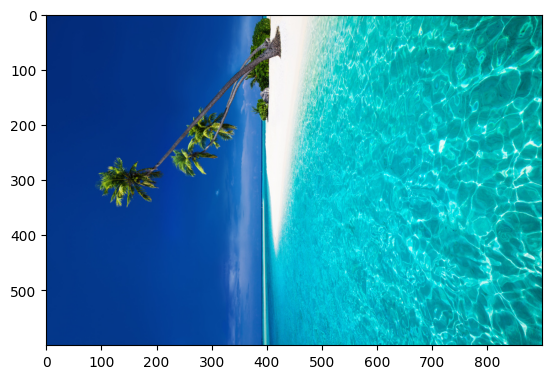

In [56]:
plt.imshow(cv2.rotate(rgb, cv2.ROTATE_90_COUNTERCLOCKWISE))

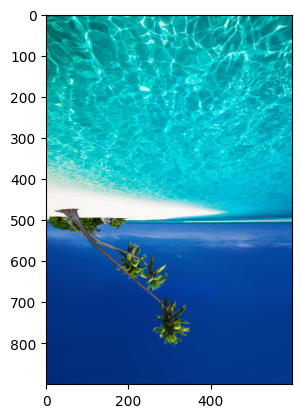

In [59]:
plt.imshow(cv2.rotate(rgb, cv2.ROTATE_180))

450 300


In [68]:
rotation_matrix

array([[  0.93969262,  -0.34202014, 172.00127826],
       [  0.34202014,   0.93969262, -75.46772235]])

450 300


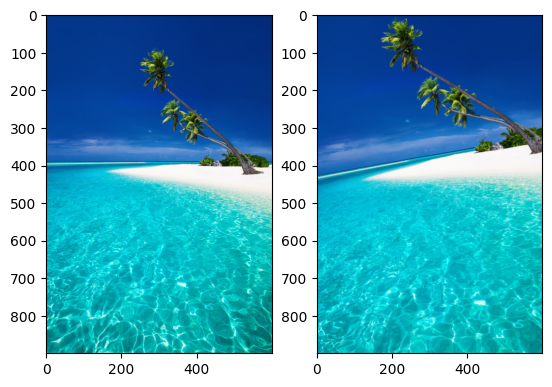

In [79]:
height, width = rgb.shape[:2]
height, width = height // 2, width // 2
print(height, width)
rotation_matrix = cv2.getRotationMatrix2D((width, height), angle=10, scale=1.25)
plt.subplot(1,2,1)
plt.imshow(rgb)

plt.subplot(1,2,2)
plt.imshow(cv2.warpAffine(rgb, rotation_matrix, rgb.shape[:2][::-1]))

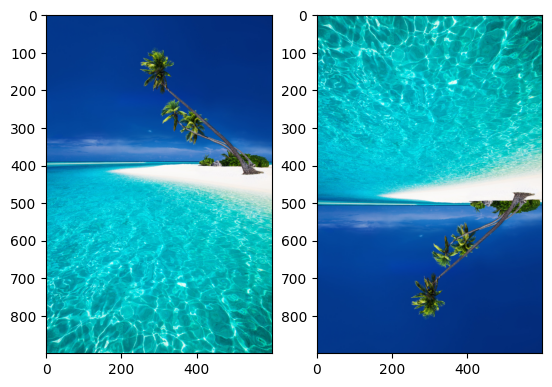

In [ ]:
# Vertical flip
plt.subplot(1,2,1)
plt.imshow(rgb)

plt.subplot(1,2,2)
plt.imshow(cv2.flip(rgb, 0))

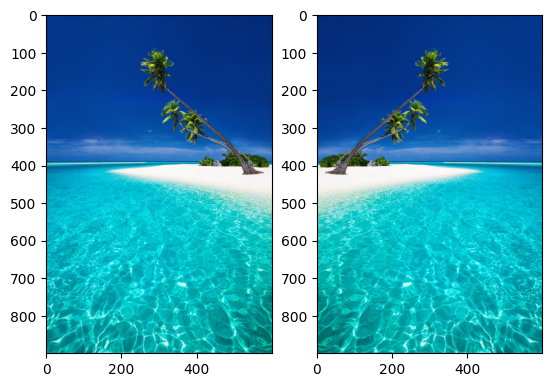

In [82]:
# Horizontal flip
plt.subplot(1,2,1)
plt.imshow(rgb)

plt.subplot(1,2,2)
plt.imshow(cv2.flip(rgb, 1))

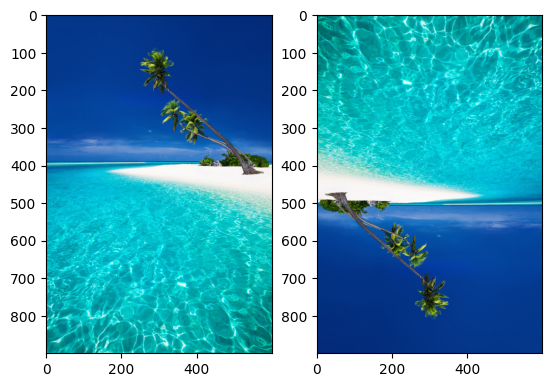

In [84]:
# 1stVertical 2ndHorizontal flip
plt.subplot(1,2,1)
plt.imshow(rgb)

plt.subplot(1,2,2)
plt.imshow(cv2.flip(rgb, -1))